In [12]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

eu_rosters = pd.read_csv('../week-1/European_Rosters.csv')
eu_rosters = eu_rosters.fillna(0)
eu_rosters.head()

FullName         PlayerName Affiliation      League  \
0  Anthony Mbu Agogo Modeste    Anthony Modeste  1. FC Koln  Bundesliga   
1                          0      Benno Schmitz  1. FC Koln  Bundesliga   
2    Birger Danny Verstraete  Birger Verstraete  1. FC Koln  Bundesliga   
3       Brady Canfield Scott        Brady Scott  1. FC Koln  Bundesliga   
4                          0  Christian Clemens  1. FC Koln  Bundesliga   

  Jersey  Birth Date  Age            birthPlace  Height (meters)  \
0    #27   4/14/1988   31                Cannes             1.87   
1     #2  11/17/1994   25               München             1.82   
2     #8   4/16/1994   25              Oostende             1.75   
3    #31   6/30/1999   20  Petaluma, California             1.87   
4    #17    8/4/1991   28                  Köln             1.79   

   Citizenship 1  ... Youth Club 7    nationality Games Played  \
0         France  ...            0         France            1   
1        Germany  ...            0        Germany            0   
2        Belgium  ...            0        Belgium            0   
3  United States  ...            0  United States           14   
4        Germany  ...            0        Germany           15   

  Market Value (Euros)          Last Updated Date  \
0            7000000.0  Last update: Jun 12, 2019   
1            1000000.0  Last update: Jun 12, 2019   
2            4000000.0  Last update: Jun 10, 2019   
3             100000.0  Last update: Jun 12, 2019   
4            1750000.0  Last update: Jun 12, 2019   

  Accumulated Transfer Sums (Euros) Highest Market Value (Euros)  \
0                          45700000                   20000000.0   
1                           1000000                    1750000.0   
2                           4850000                    4000000.0   
3                                 0                     100000.0   
4                           7950000                    3500000.0   

  Highest Market Value Date NationalTeamCaps MostRecentInjury  
0                 6/19/2017               16                0  
1                 3/22/2017               11                0  
2                 9/11/2018                1                0  
3                  8/3/2018                0                0  
4                 6/29/2013                5                0  

[5 rows x 35 columns]

In [14]:
eu_rosters_train, eu_rosters_test = train_test_split(eu_rosters, test_size=0.3, random_state=42)
print(eu_rosters_train.shape, eu_rosters_test.shape)

(3015, 35) (1293, 35)


In [134]:
features= ['Games Played', 'NationalTeamCaps', 'Market Value (Euros)']
dt_classification = DecisionTreeClassifier(max_depth = 9) # Increase max_depth to see effect in the plot
dt_classification.fit(eu_rosters_train[features], eu_rosters_train['League'])

DecisionTreeClassifier(max_depth=9)

In [135]:
predictions = dt_classification.predict(eu_rosters[features])

def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

(predictions, eu_rosters_train.League)

(array(['Serie A', 'Eredivisie', 'Bundesliga', ..., 'Serie A',
        'Bundesliga', 'Eredivisie'], dtype=object),
 485               Liga NOS
 2634            Eredivisie
 2372               Ligue 1
 258                Serie A
 3282               Ligue 1
                ...        
 3444        Premier League
 466               Liga NOS
 3092               Serie A
 3772               Ligue 1
 860     Jupiler Pro League
 Name: League, Length: 3015, dtype: object)

In [136]:
predictionsOnTrainset = dt_classification.predict(eu_rosters_train[features])
predictionsOnTestset = dt_classification.predict(eu_rosters_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, eu_rosters_train.League)
accuracyTest = calculate_accuracy(predictionsOnTestset, eu_rosters_test.League)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.3963515754560531
Accuracy on test set 0.2374323279195669


In [137]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph

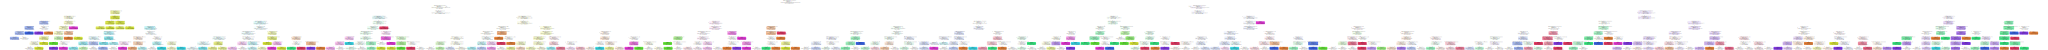

In [138]:
plot_tree_classification(dt_classification, features, eu_rosters_train.League.unique())

It's hard to predict from which legua a player is. The tree is quit complex, i understand what the tree is doing. But i think there is not a corolation between the features.